# PNEUMONIA DETECTION ON CHEST X-RAY IMAGES USING DEEP LEARNING

This image classifiaction project with deep learning was carried out by Part-Time Moringa Students (**Team 5 - Darvin, Mary, Shadrack & Marvin**) under the supervision of Technical Mentor Samwel Jane on June 2023 as part of their end of phase deliverable.

We shall be using the CRoss-Industry Standard Process for Data Mining (CRISP-DM) Framework to organize this project.

 - Business Understanding
 - Data Understanding
 - Data Preparation
 - Modelling & Evaluation
 - Recommendations/Conclussion
 
## Introduction

Application of Machine Learning, Deep Learning or/and Artifical Intelligence has increased tremendiously in the field of medicine over the past few years. Especially if we see sub-field of medical imagings in which we try to analyse images of Xrays, ECGs (Electrocardiogram) and other technologies to diagnose diseases or ailments in various patients. 

## 1.0 BUSINESS UNDERSTANDING

Pneumonia is a leading cause of death worldwide, and early detection is crucial for effective treatment. Manual interpretation of chest X-ray images by radiologists is time-consuming and prone to human error, leading to delayed diagnosis and treatment. 

**Objective**: To develop a deep learning model to automate the process of pneumonia detection from chest X-ray images, enabling faster and more accurate diagnosis.

## 2.0 DATA UNDERSTANDING (About the Dataset)

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal) - labelled data

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system.

We shall proceed to perform data exploration: Understand the characteristics of the data, identify any data quality issues, and explore potential patterns or features that can aid in pneumonia detection.

## 3.0 DATA PREPARATION

**Data cleaning**: Address any missing values, outliers, or inconsistencies in the dataset. Feature engineering: Extract meaningful features from the chest X-ray images that can contribute to pneumonia detection, such as texture patterns or lung region segmentation. Data transformation: Normalize or standardize the data as required for the deep learning model.

### Importing Necessary Libraries, Loading & Preprocessing Datasets

In [1]:
#Importing all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
!pip install gradio
import gradio as gr

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Loadiing & Preprocessing Datasets

In [3]:
labels = ['PNEUMONIA','NORMAL']

img_size = 200 #fixing image size to 200 pixels

#defining function that imports our data directly and returns a numpy array collection of data
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #Reshape image preffered size
                data.append([resized_arr, class_num])
            except Exception as e:
                    print (e)
    return np.array(data)

In [4]:
# # installing and importing the opendatasets so as to use it retrieve datasets from kaggle
# !pip install opendatasets --upgrade --quiet
# import opendatasets as od

In [5]:
# # Downloading the data from kaggle
# kaggle_link = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia'
# od.download(kaggle_link)

In [6]:
#Loading the dataset
train = get_data('chest_xray/chest_xray/train')
test = get_data('chest_xray/chest_xray/test')
val = get_data('chest_xray/chest_xray/val')

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



Next we are going to split our X and y labels for all the three training, validation and testing datasets all containing two variables: **feature**(These are the images) and **label** (0: Normal; 1: Pneumonia) and appending features on respective datasets.

In [90]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

### Data Visualization

#### Visualizing Pneumonia & Normal Xray Images Distributions

Create a bar plot to visualize the image distribution to enable us visualize the distribution of labels ‘Normal’ and ‘Pneumonia’ in the Train, Validation and Test Folders.

In [94]:
pneumonics = []
normals = []
labels = ['PNEUMONIA','NORMAL']
for i in range(len(y_train)):
    if y_train[i]:
        pneumonics.append(x_train[1])
    else:
        normals.append(x_train[1])

In [121]:
test_pneumonics = []
test_normals = []
for i in range(len(y_test)):
    if y_test[i]:
        test_pneumonics.append(x_test[1])
    else:
        test_normals.append(x_test[1])

In [120]:
val_pneumonics = []
val_normals = []
for i in range(len(y_val)):
    if y_val[i]:
        val_pneumonics.append(x_val[1])
    else:
        val_normals.append(x_val[1])

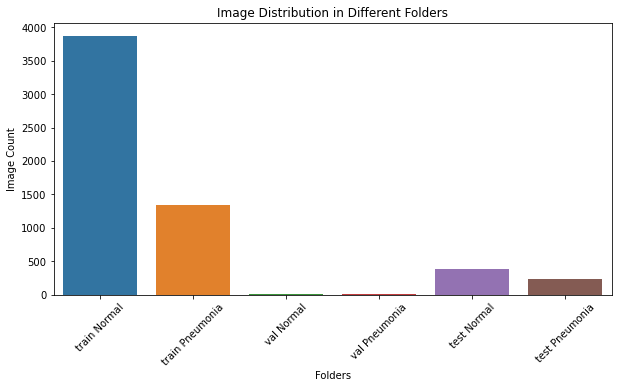

In [125]:
labells = ['train Normal', 'train Pneumonia', 'val Normal', 'val Pneumonia', 'test Normal', 'test Pneumonia']
image_counts = [
    len(normals),
    len(pneumonics),
    len(val_normals),
    len(val_pneumonics),
    len(test_normals),
    len(test_pneumonics)
]

plt.figure(figsize=(10, 5))
sns.barplot(x=labells, y=image_counts)
plt.title('Image Distribution in Different Folders')
plt.xlabel('Folders')
plt.ylabel('Image Count')
plt.xticks(rotation=45)
plt.show()

**Few Validation Images**

According to this result, we have imbalanced image dataset. We shall normalize dataset to remove biasness. We will increase the "Normal" image dataset using Data Augmentation to correct this imbalance.

We proceed to further visualize respective xray images for both 'Pneumonic' and 'Normal' loaded images

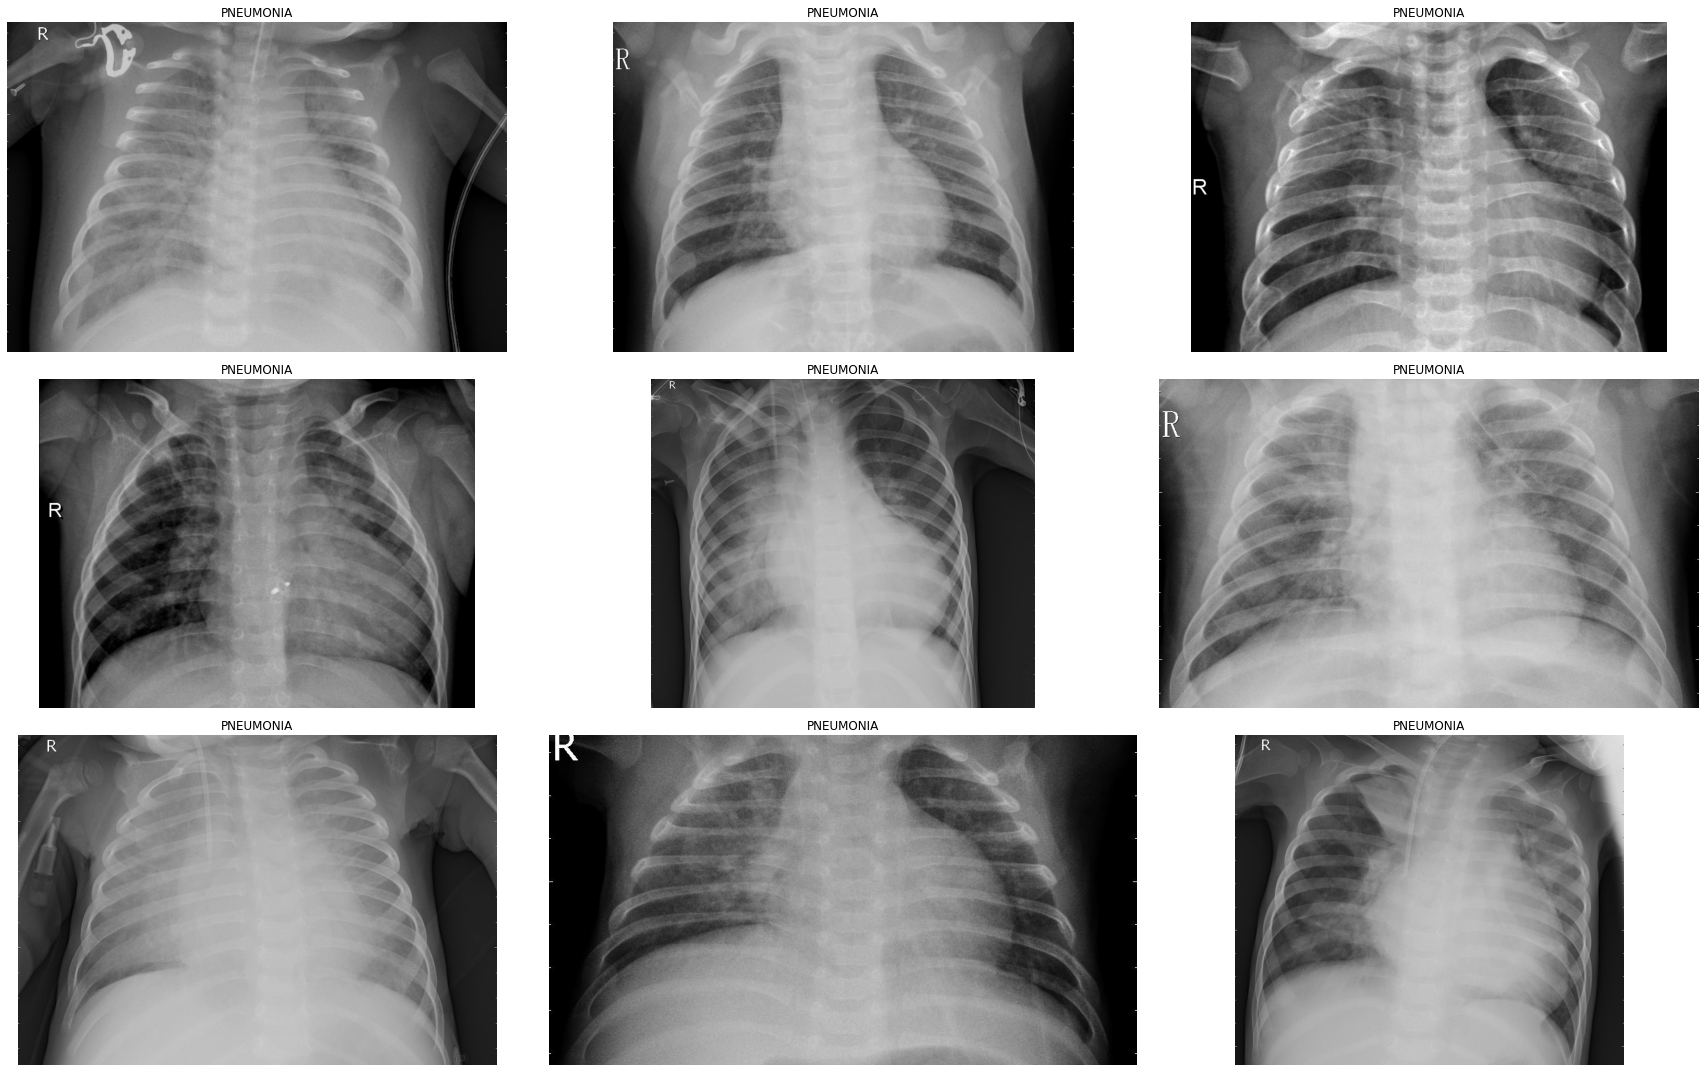

In [10]:
#visualizing Pneumonic images on training set
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"
plt.figure(figsize=(25, 15))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    xray_img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(xray_img, cmap='gray')
    plt.axis('off')
    plt.title("PNEUMONIA") 
plt.tight_layout()

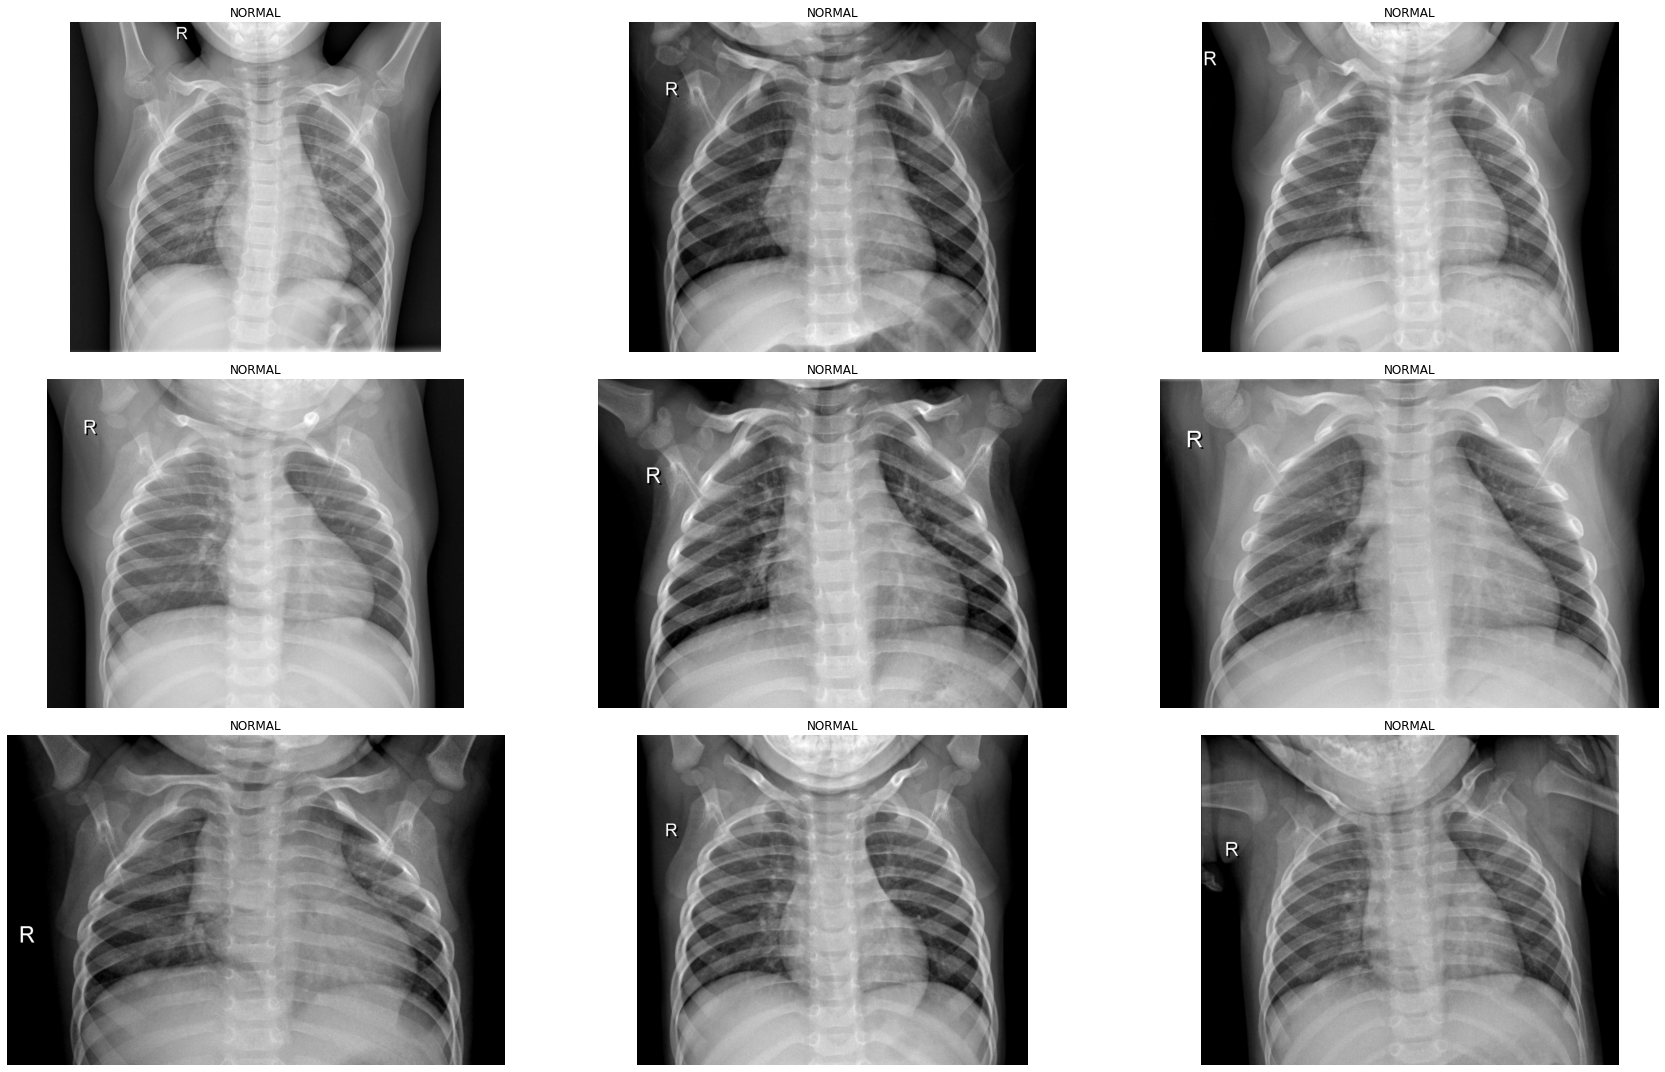

In [11]:
# Visualizing Normal images on the train set
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(25, 15))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    xray_img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(xray_img, cmap='gray')
    plt.axis('off')
    plt.title("NORMAL") 
   
plt.tight_layout()

Pneumonia is normaly detected by existance of opacity in chest x-rays. From images produced above, Pneumonic xray images look generally opaque as compared to Normal xray images.

**checking on effects of illumination**

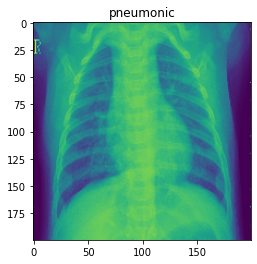

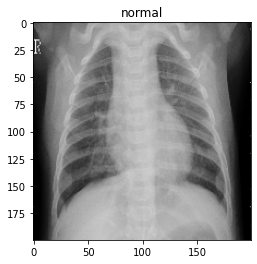

In [86]:
# visualizing the pneumonic and normal xray images
# to demonstrate illumination effects

plt.imshow(pneumonics[2])
plt.title('pneumonic')
plt.show()

plt.imshow(normals[1], cmap='gray')
plt.title('normal')
plt.show()

 In the above visualization, it is clear that illumination effects posses differences.
 
 We shall normalize the images using grayscale normalization to reduce the effects of illuminations.

### Images Standardization

Visualization of how standardization helps to distribute the pixel values:

It is very common to standardize and/or center your dataset. For images, a common thing that is done is to make sure each pixel value is between 0 and 1. This can be done by dividing the entire matrix by 255 (RGB pixel in an image takes a value between 0 and 255)

In [72]:
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

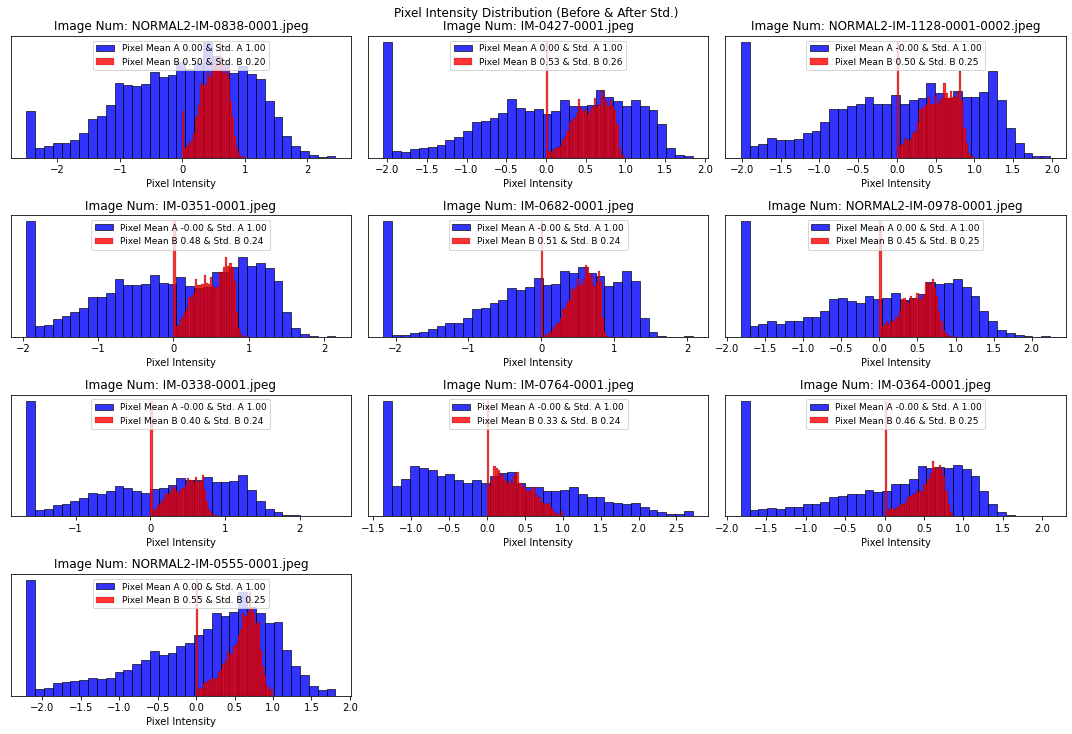

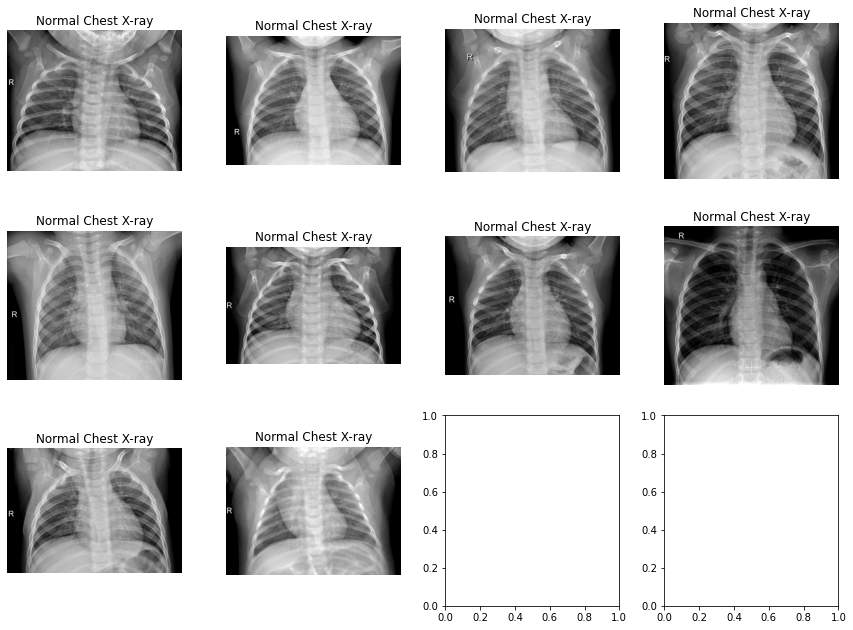

In [84]:
train_normal = os.listdir('chest_xray/train/NORMAL')
labels = ['NORMAL']

train_im_n_selected = random.sample(train_normal, 10)

fig = plt.figure(figsize=(15, 15))
count = 1
valid_files = []

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('chest_xray/train/NORMAL', img)
    if os.path.isfile(sample_path):
        valid_files.append(img)
        sample_img = Image.open(sample_path)
        sample_img = np.array(sample_img)
        sample_img = sample_img / 255.0
        sample_img_mean = np.mean(sample_img)
        sample_img_std = np.std(sample_img)
        new_sample_img = (sample_img - sample_img_mean) / sample_img_std
        ax = fig.add_subplot(6, 3, count, yticks=[])
        sns.histplot(new_sample_img.ravel(),
                     label=f'Pixel Mean A {np.mean(new_sample_img):.2f} & Std. A {np.std(new_sample_img):.2f}',
        sns.histplot(sample_img.ravel(),
                     label=f'Pixel Mean B {np.mean(sample_img):.2f} & Std. B {np.std(sample_img):.2f}',
                     kde=False, color='red', bins=35, alpha=0.8)
        plt.legend(loc='upper center', fontsize=9)
        plt.title('Image Num: %s' % img)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('# Pixels in Image')
        count += 1
    else:
        print(f"File not found: {sample_path}")

fig.suptitle('Pixel Intensity Distribution (Before & After Std.)')
plt.tight_layout()
plt.show()

# Remove missing files from train_im_n_selected list
train_im_n_selected = valid_files

# Display X-ray images in a tight grid
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.ravel()

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('chest_xray/train/NORMAL', img)
    sample_img = Image.open(sample_path)
    sample_img = np.array(sample_img)

    # Display the image in the corresponding subplot
    axes[i].imshow(sample_img, cmap='gray')
    axes[i].set_title('Normal Chest X-ray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Normalizing Dataset

Performing greyscale normalization to reduce effects of illuminization

In [13]:
## Normaling the training data using grayscale normalization
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

We will then resize the data for CNN training and testing

In [14]:
# Resizing our data for deep learning with CNN
# Training set
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

# Testing set
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Value set
x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [15]:
# reshaping the y values
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

CNN does not take care of images with different rotations, scales or with different properties. Hence the next step for Data Augmentation

## Data Augmentation

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

Purpose to reduce overfitting by applying a couple of transformations to our training data (grayscales, horizontal flips,rotations, vertical flips, etc)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

## 4.0 MODELLING & EVALUATION

**Modeling**: deep learning architecture for pneumonia detection, such as Convolutional Neural Networks (CNNs). Train the model using the prepared dataset, optimizing the model's parameters and hyperparameters. Validate and evaluate the model's performance using appropriate evaluation metrics, such as accuracy, sensitivity, specificity, or area under the receiver operating characteristic curve (AUC-ROC).

**Evaluation**: Assess the model's performance against the project objectives, considering factors like accuracy, speed, and interpretability. Identify any limitations or areas for improvement in the model's performance. Iterate on the modeling process if necessary, by refining the architecture, adjusting hyperparameters, or gathering additional data. Deployment:

Integrate the trained model into a software or web-based application that can accept chest X-ray images as input and provide automated pneumonia detection. Test the deployed system thoroughly to ensure its functionality, reliability, and accuracy. Monitor the system's performance in real-world scenarios and make necessary updates or improvements as needed. Maintenance:

Continuously monitor and evaluate the system's performance, incorporating feedback from radiologists and healthcare professionals. Update the model periodically to account for new data, evolving medical guidelines, or advancements in deep learning techniques.

### Baseline Model CNN with 4 hidden layers

In [17]:
# CNN
# Training the model
#Initiatialize model and proceed by addingn layers (Convulation, Normalization, Max Pooling, Dense) with 'relu' as preffred activation function

# building the model
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (200,200,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# Flattening layer
model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

#compile neural network
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

Once we have defined the network architecture and added layers to our network, we then compile the model before then training that model on our data.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0

**2,032,833 trainable parameters!**

In [20]:
# At this point, with increase in epochs size, gradient does not increase (Gradient zero but not minima)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.3, 
                                            min_lr=0.000001)

#### Train the Model

In [21]:
#fitting the model

history = model.fit(datagen.flow(x_train, y_train, batch_size = 32) ,
                    epochs = 10 , 
                    validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = learning_rate_reduction)

Epoch 1/10
163/163 [==============================] - 1073s 7s/step - loss: 0.6754 - accuracy: 0.8391 - val_loss: 50.7955 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 997s 6s/step - loss: 0.3291 - accuracy: 0.8930 - val_loss: 30.3715 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - ETA: 0s - loss: 0.2426 - accuracy: 0.9116
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 923s 6s/step - loss: 0.2426 - accuracy: 0.9116 - val_loss: 37.0141 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 566s 3s/step - loss: 0.1779 - accuracy: 0.9438 - val_loss: 16.8389 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 668s 4s/step - loss: 0.1555 - accuracy: 0.9452 - val_loss: 0.9433 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 638s 4s/step - loss: 0.1449 - accuracy: 0.9509 - val_loss: 0.

#### Plot (Visualizing our Loss & Accuracy Curves)

Now, let's inspect the model's performance to detect any overfitting or other issues.

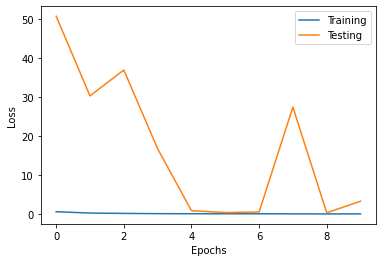

In [22]:
#loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend(['Training', 'Testing'])
plt.show()

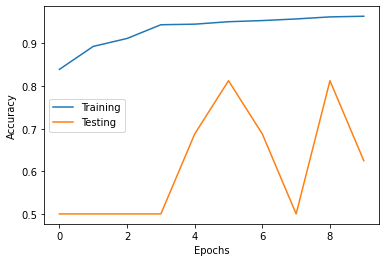

In [23]:
#Accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['Training', 'Testing'])
plt.show()

Training accuracy increases as we increase epochs while validation accuracy irregular due to data variations.

Training loss remains relatively low & constant which is a good story

In [24]:
model.save_weights('pneumoniadetection')

#### Evalutaion & Prediction Metrics

In [25]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 8s 389ms/step - loss: 0.3648 - accuracy: 0.8846
Loss of the model is -  0.36480313539505005
20/20 [==============================] - 9s 472ms/step - loss: 0.3648 - accuracy: 0.8846
Accuracy of the model is -  88.46153616905212 %


Printing the validation accuracy of the model

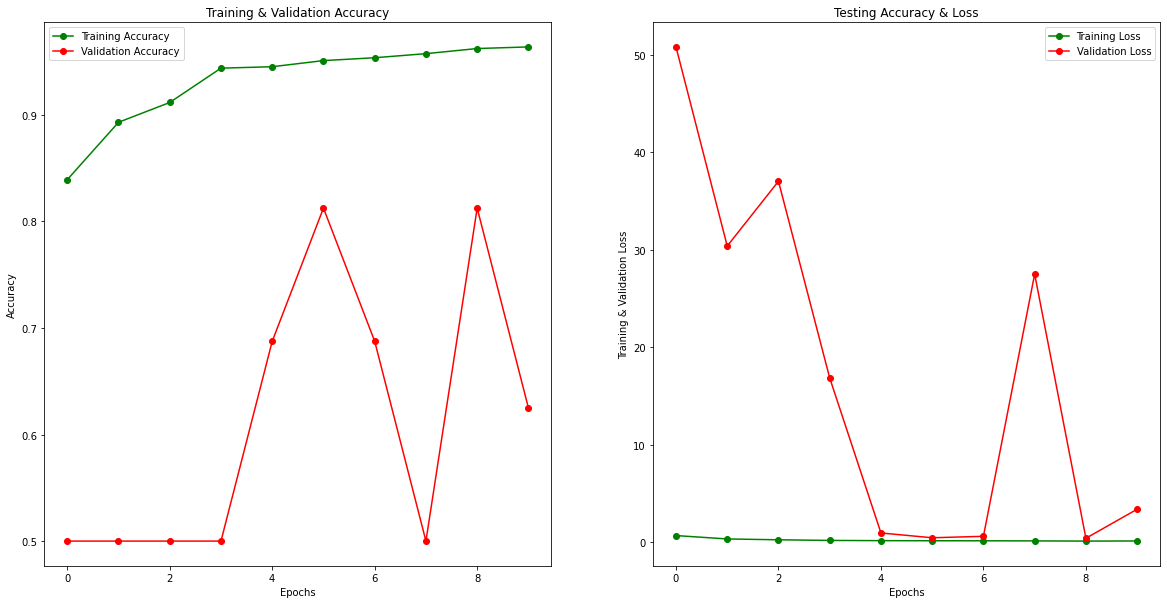

In [26]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

If you run the model for more epochs, you'll see the model's performance continues to improve until the validation metrics plateau and the model begins to overfit to training data.

In [27]:
predictions = model.predict(x_test)
for i in range(len(predictions)):
    predictions[i] = 1 if predictions[i]>0.5 else 0

In [28]:
print(classification_report(y_test,
                           predictions,
                           target_names = ['Pneumonia(class 0)', 'Normal(class 1)']))

                    precision    recall  f1-score   support

Pneumonia(class 0)       0.86      0.97      0.91       390
   Normal(class 1)       0.93      0.75      0.83       234

          accuracy                           0.88       624
         macro avg       0.90      0.86      0.87       624
      weighted avg       0.89      0.88      0.88       624



In [29]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
cm

,0,1
0,377,13
1,59,175


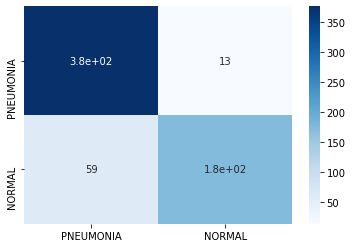

In [30]:
sns.heatmap(cm, cmap = 'Blues', annot = True, xticklabels = labels, yticklabels = labels)
plt.show()

In [31]:
def pneumoniaprediction(img):
    img = np.array(img)/255
    img = img.reshape(-1, 200, 200, 1)
    isPneumonic = model.predict(img)[0]
    imgClass = "Normal" if isPneumonic < 0.5 else "Pneumonic"
    return imgClass

In [32]:
pr = model.predict(x_test)
for i in range(len(pr)):
    if pr[i]>0.5:
        pr[i] = 1
    else:
        pr[i] = 0

In [126]:
img = gr.inputs.Image(shape = (200, 200))
label = gr.outputs.Label(num_top_classes = 1)

C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [ ]:
interface = gr.Interface(fn = pneumoniaprediction,
                            title = "Pneumonia detection using xray",
                            inputs = img,
                            outputs = label,
                            interpretation = "default")
interface.launch(debug=True, share=True)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://93d4b947fff60d28d8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


 We used gradio to deploy our model for real image testing
 

### *CNN model with 4 hidden layers gives best results with 88% Prediction accuracy*

## 5.0 RECOMMENDATIONS/CONCLUSSION

This model can be used in Healthcare sector in the radiological department to assist predict chest xray images easily and accutately. Similar model likewise can be improved on and deployed to assist with detection of any infectious lung diseases.